In [62]:
import pandas as pd

# Load the dataset
file_path = R"C:\Users\acer\Downloads\twitter_training.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info(), data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


(   TweetID       Entity Sentiment  \
 0     2401  Borderlands  Positive   
 1     2401  Borderlands  Positive   
 2     2401  Borderlands  Positive   
 3     2401  Borderlands  Positive   
 4     2401  Borderlands  Positive   
 
                                        Tweet Content  
 0  im getting on borderlands and i will murder yo...  
 1  I am coming to the borders and I will kill you...  
 2  im getting on borderlands and i will kill you ...  
 3  im coming on borderlands and i will murder you...  
 4  im getting on borderlands 2 and i will murder ...  ,
 None,
              TweetID                Entity Sentiment Tweet Content
 count   74682.000000                 74682     74682         73996
 unique           NaN                    32         4         69489
 top              NaN  TomClancysRainbowSix  Negative              
 freq             NaN                  2400     22542           172
 mean     6432.586165                   NaN       NaN           NaN
 std      3740.427

### Data Preprocessing

In [65]:
import pandas as pd
import re

# Function to clean the text in tweets
def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        # Remove mentions and hashtags
        text = re.sub(r'@\w+|#\w+', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Convert to lowercase
        text = text.lower().strip()
    else:
        text = ''  # If not a string, return an empty string
    return text

# Example DataFrame, assuming your data is in a pandas DataFrame
# data = pd.DataFrame(...)  # Load your DataFrame here

# Apply cleaning to the 'Tweet Content' column
data['Cleaned Tweet'] = data['Tweet Content'].apply(clean_text)

# Display a few cleaned tweets
data[['Tweet Content', 'Cleaned Tweet']].head()


,Tweet Content,Cleaned Tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [67]:
# Convert non-string values to empty strings and reapply the cleaning function
data['Tweet Content'] = data['Tweet Content'].fillna("").astype(str)
data['Cleaned Tweet'] = data['Tweet Content'].apply(clean_text)

# Display a few cleaned tweets
data[['Tweet Content', 'Cleaned Tweet']].head()


,Tweet Content,Cleaned Tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


### Exploratory Data Analysis

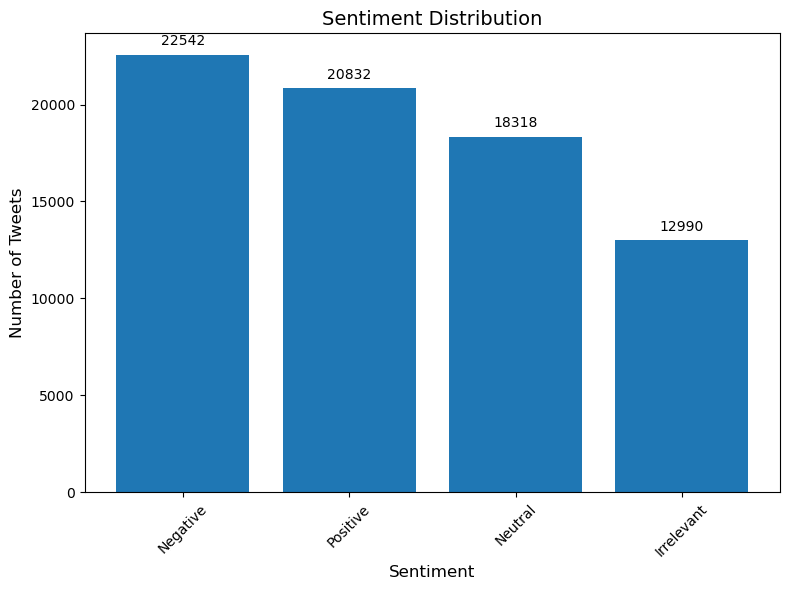

In [9]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, str(yval), ha='center', fontsize=10)

plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


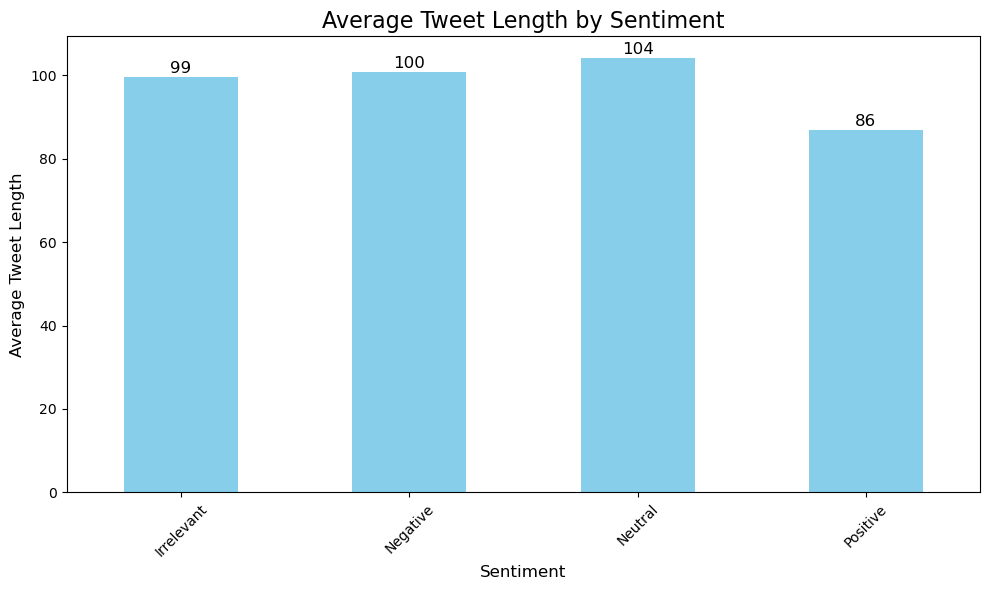

In [25]:

import matplotlib.pyplot as plt

# Calculate tweet length for each tweet
data['Tweet Length'] = data['Cleaned Tweet'].apply(len)

# Group by sentiment and calculate the average tweet length
avg_tweet_length_by_sentiment = data.groupby('Sentiment')['Tweet Length'].mean()

# Plot the average tweet length by sentiment
plt.figure(figsize=(10, 6))
bars = avg_tweet_length_by_sentiment.plot(kind='bar', color='skyblue', width=0.5)

# Title and labels
plt.title("Average Tweet Length by Sentiment", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Average Tweet Length", fontsize=12)
plt.xticks(rotation=45)

# Add numbers on top of the bars (formatted as integers)
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


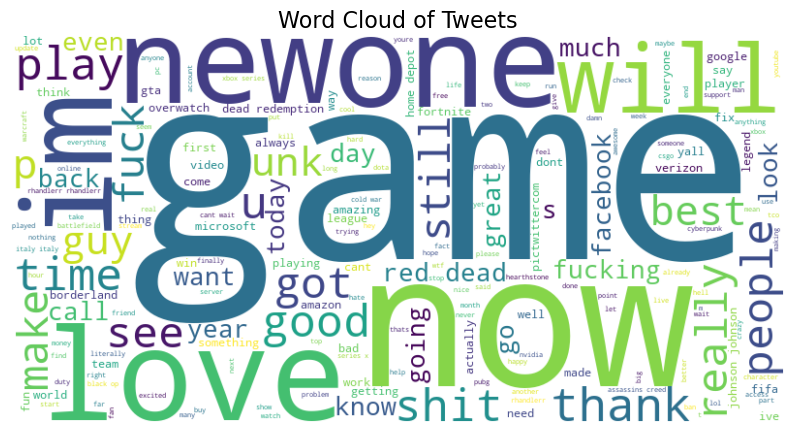

In [11]:
from wordcloud import WordCloud

# Combine all cleaned tweets into a single text for word cloud generation
all_text = " ".join(data['Cleaned Tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets", fontsize=16)
plt.show()


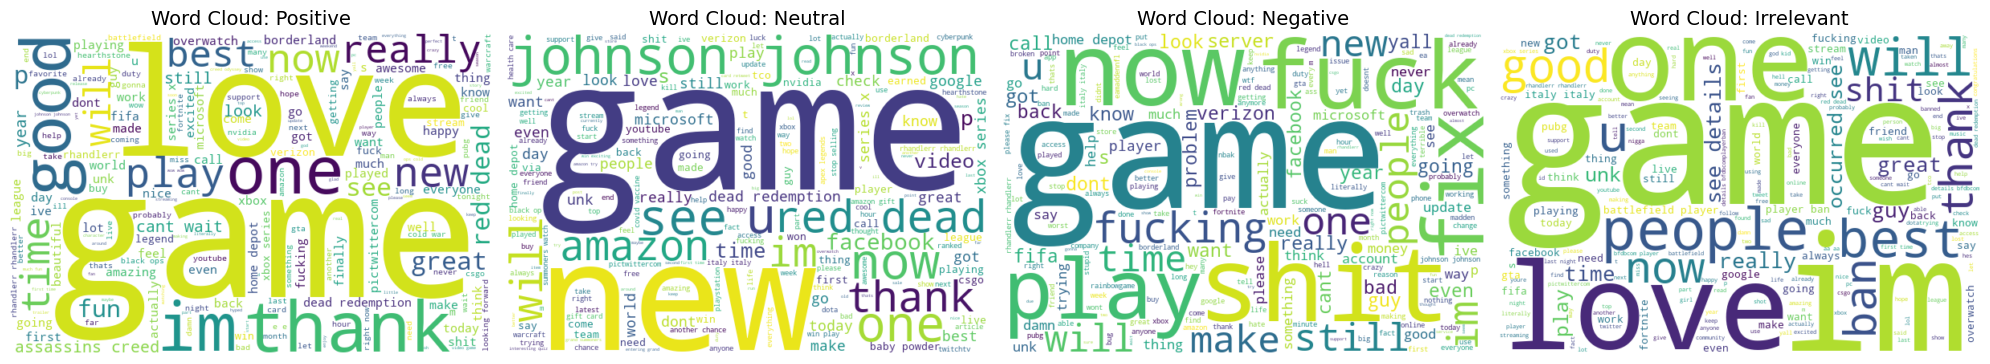

In [13]:
# Generate sentiment-specific word clouds
sentiments = data['Sentiment'].unique()
fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 8))

for i, sentiment in enumerate(sentiments):
    # Filter tweets for the specific sentiment
    sentiment_text = " ".join(data[data['Sentiment'] == sentiment]['Cleaned Tweet'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(sentiment_text)
    
    # Plot the word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Word Cloud: {sentiment}", fontsize=14)

plt.tight_layout()
plt.show()


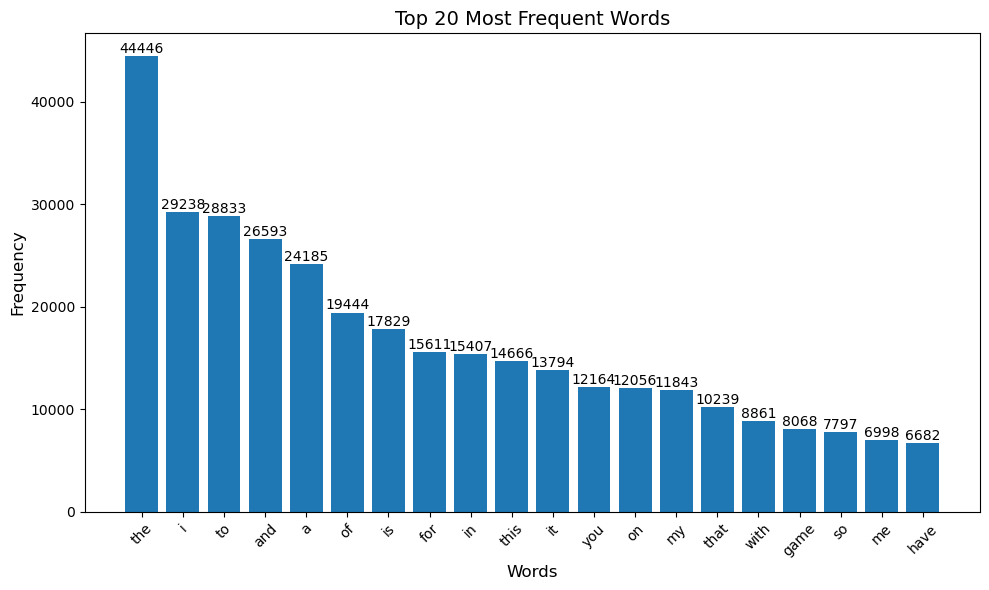

    Word  Frequency
0    the      44446
1      i      29238
2     to      28833
3    and      26593
4      a      24185
5     of      19444
6     is      17829
7    for      15611
8     in      15407
9   this      14666
10    it      13794
11   you      12164
12    on      12056
13    my      11843
14  that      10239
15  with       8861
16  game       8068
17    so       7797
18    me       6998
19  have       6682


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Tokenize the cleaned tweets into individual words
all_words = " ".join(data['Cleaned Tweet']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 20 most frequent words
most_common_words = word_counts.most_common(20)

# Convert to a DataFrame for visualization
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most frequent words
plt.figure(figsize=(10, 6))
bars = plt.bar(freq_df['Word'], freq_df['Frequency'])

# Annotate each bar with the frequency count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title("Top 20 Most Frequent Words", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the data table for reference
print(freq_df)

In [17]:
import pandas as pd
from collections import Counter

# Assuming 'data' and 'word_counts' are already defined

# Find rare words (words with a frequency of 1)
rare_words = [word for word, count in word_counts.items() if count == 1]

# Create a DataFrame of rare words
rare_words_df = pd.DataFrame(rare_words, columns=['Rare Words'])

# Display the number of rare words
num_rare_words = len(rare_words)

# Display a sample of rare words
sample_rare_words = rare_words_df.sample(20, random_state=42)  # Randomly sample 20 rare words for inspection

# Display the sample of rare words using pandas (for Jupyter notebooks)
import pandas as pd
display(sample_rare_words)  # This works in Jupyter environments

# For regular Python environments, use print()
# print(sample_rare_words)

# Print the total number of rare words
print(f"Total number of rare words: {num_rare_words}")


,Rare Words
2167,crimson
9595,abilites
9349,viewcommrmarlins
8197,nowbehcmnhenzik
2846,stranded
8498,emit
6951,invoice
8600,imufktx
5769,roccozoom
9748,wasters


Total number of rare words: 11484


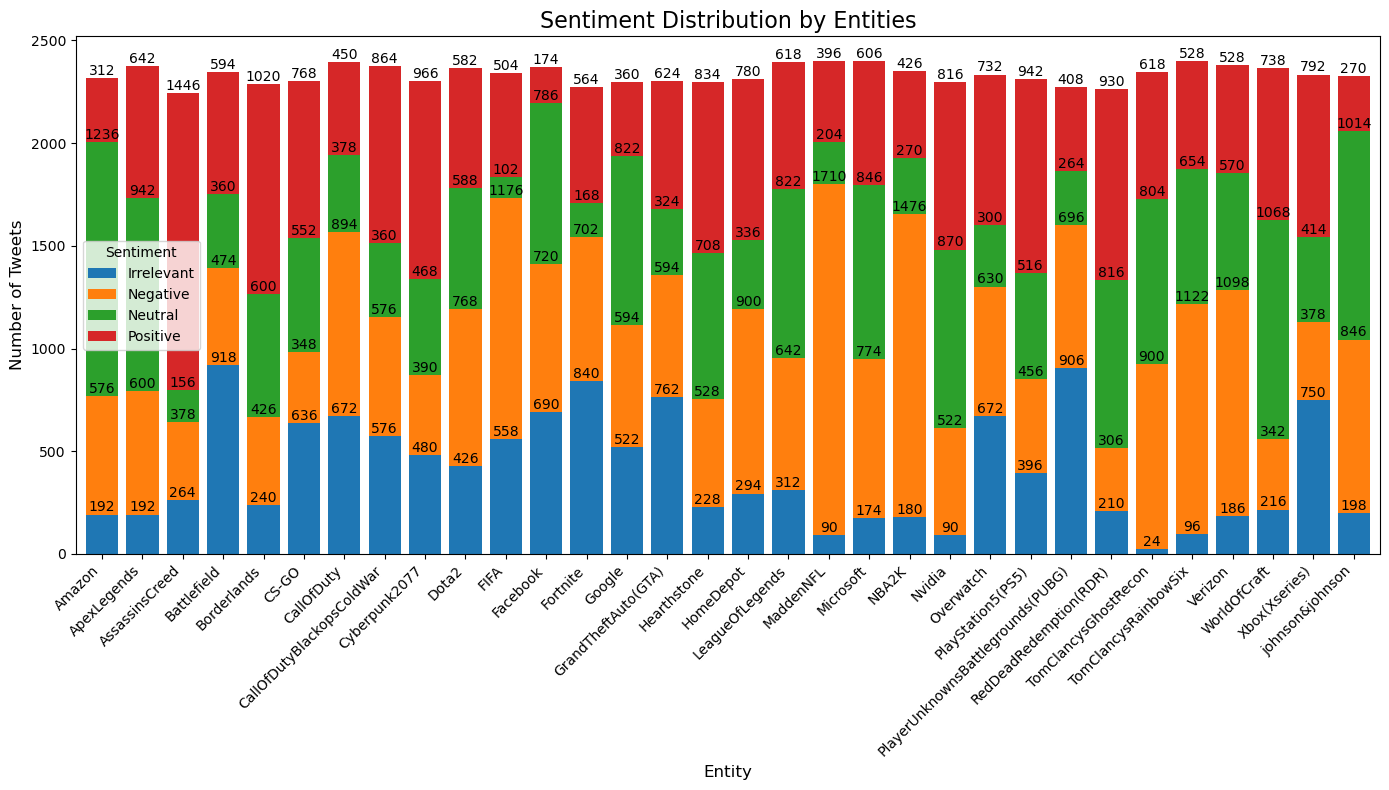

In [19]:
import matplotlib.pyplot as plt

# Group by Entity and Sentiment to count occurrences
entity_sentiment_counts = data.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Plot sentiment distribution by entity (stacked bar)
ax = entity_sentiment_counts.plot(kind='bar', figsize=(14, 8), stacked=True, width=0.8)

# Title and labels
plt.title("Sentiment Distribution by Entities", fontsize=16)
plt.xlabel("Entity", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the tick positions manually for better alignment
ax.set_xticks(range(len(entity_sentiment_counts)))

# Add a legend and customize
plt.legend(title="Sentiment", fontsize=10)

# Annotate each bar with the count
for p in ax.patches:  # Loop over each segment in the stacked bars
    # Get the height of the bar segment (the count)
    height = p.get_height()
    # Get the x-position of the segment to place the text in the middle
    x_pos = p.get_x() + p.get_width() / 2
    # Place the count label slightly above the segment
    ax.text(x_pos, p.get_y() + height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=10)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


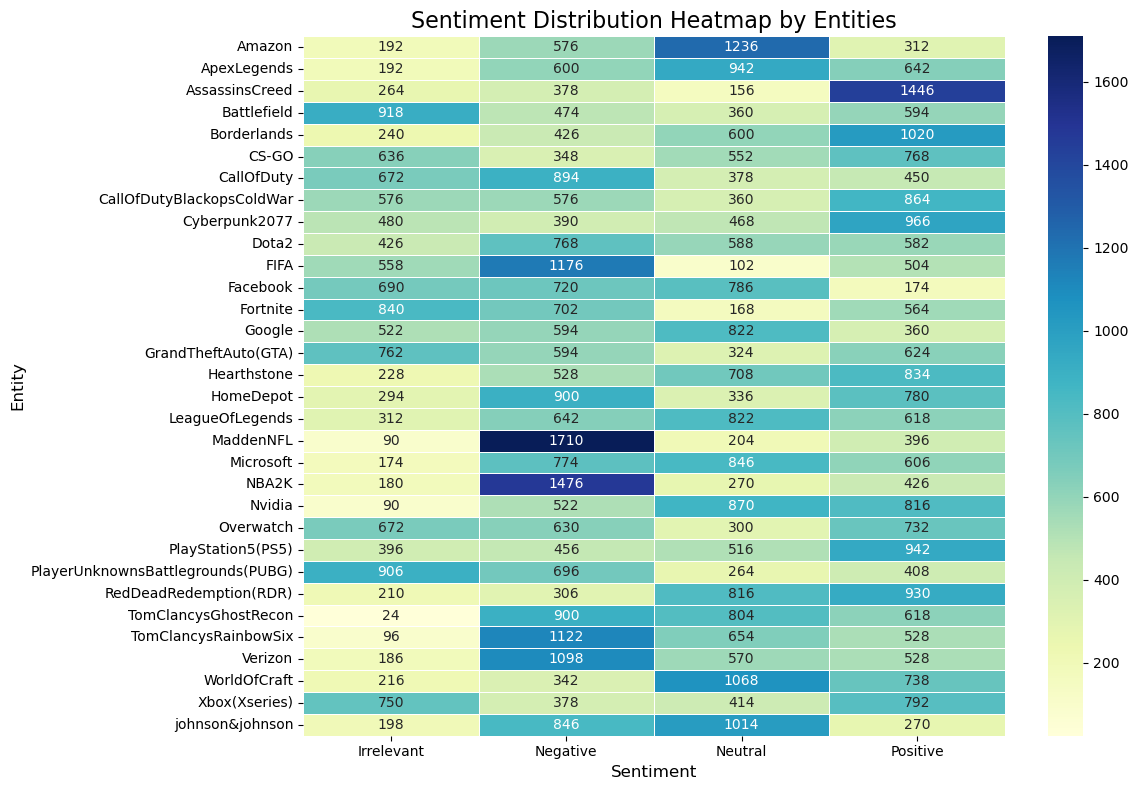

In [21]:
import seaborn as sns

# Create a pivot table for sentiment distribution across entities
heatmap_data = data.pivot_table(index='Entity', columns='Sentiment', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Sentiment Distribution Heatmap by Entities", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Entity", fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate n-grams
def generate_ngrams(corpus, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    
    # Combine and sort by frequency
    ngram_freq = sorted(list(zip(ngram_features, ngram_counts)), key=lambda x: x[1], reverse=True)[:top_k]
    return pd.DataFrame(ngram_freq, columns=['Phrase', 'Frequency'])

# Generate bigrams (2-word phrases)
bigrams_df = generate_ngrams(data['Cleaned Tweet'], n=2)

# Generate trigrams (3-word phrases)
trigrams_df = generate_ngrams(data['Cleaned Tweet'], n=3)

# Display the results
print("Top Bigrams:")
print(bigrams_df)

print("\nTop Trigrams:")
print(trigrams_df)


Top Bigrams:
                 Phrase  Frequency
0              red dead       1495
1       johnson johnson       1201
2       dead redemption       1186
3            home depot        967
4   rhandlerr rhandlerr        802
5       assassins creed        781
6           italy italy        769
7           xbox series        709
8        league legends        684
9         access health        516
10            black ops        508
11             cold war        442
12       world warcraft        394
13          baby powder        382
14          health care        353
15             ops cold        337
16     occurred details        326
17   battlefield player        317
18         apex legends        301
19           looks like        299

Top Trigrams:
                           Phrase  Frequency
0             red dead redemption       1114
1               italy italy italy        761
2   rhandlerr rhandlerr rhandlerr        454
3              access health care        344
4           

### feature engineering

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Vectorize the cleaned tweet text
X = tfidf_vectorizer.fit_transform(data['Cleaned Tweet'])

# Display the shape of the resulting matrix
X.shape


(74682, 5000)

### Sentiment Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])

# Display unique sentiment labels and their encoded values
encoded_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
encoded_labels


{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}

In [74]:
# Retry splitting with error handling
try:
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Display the sizes of the splits
    split_shapes = {
        "X_train shape": X_train.shape,
        "X_test shape": X_test.shape,
        "y_train shape": y_train.shape,
        "y_test shape": y_test.shape,
    }
    split_shapes
except Exception as e:
    str(e)

### Model Development

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Ensure X and y are properly set
X = tfidf_vectorizer.fit_transform(data['Cleaned Tweet'])
y = label_encoder.fit_transform(data['Sentiment'])

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Re-attempt training with optimized solver for sparse data
baseline_model = LogisticRegression(max_iter=1000, random_state=42, solver='saga')
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
baseline_accuracy = accuracy_score(y_test, y_pred)
classification_report_baseline = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the results in a better format
print("Model Evaluation Results:")
print("-" * 50)
print(f"Accuracy: {baseline_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_baseline)


Model Evaluation Results:
--------------------------------------------------
Accuracy: 0.6791

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.70      0.50      0.59      2598
    Negative       0.67      0.80      0.73      4509
     Neutral       0.67      0.61      0.64      3664
    Positive       0.69      0.72      0.71      4166

    accuracy                           0.68     14937
   macro avg       0.68      0.66      0.66     14937
weighted avg       0.68      0.68      0.67     14937



In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=6,       # Limit depth of trees
    learning_rate=0.1, # Step size shrinkage
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)

# Print the results in a better format
print("XGBoost Model Evaluation Results:")
print("-" * 50)
print(f"Accuracy: {xgb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_xgb)


C:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:20:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Evaluation Results:
--------------------------------------------------
Accuracy: 0.5448

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.72      0.19      0.30      2598
    Negative       0.47      0.82      0.60      4509
     Neutral       0.63      0.41      0.50      3664
    Positive       0.60      0.59      0.60      4166

    accuracy                           0.54     14937
   macro avg       0.61      0.50      0.50     14937
weighted avg       0.59      0.54      0.52     14937



In [37]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model
svm_model = LinearSVC(random_state=42, max_iter=2000)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_)

# Print the results in a better format
print("SVM Model Evaluation Results:")
print("-" * 50)
print(f"Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_svm)


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Model Evaluation Results:
--------------------------------------------------
Accuracy: 0.6982

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.70      0.56      0.63      2598
    Negative       0.69      0.80      0.74      4509
     Neutral       0.70      0.63      0.66      3664
    Positive       0.71      0.74      0.72      4166

    accuracy                           0.70     14937
   macro avg       0.70      0.68      0.69     14937
weighted avg       0.70      0.70      0.70     14937



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure that your data is already split and encoded (e.g., using label encoding for y_train and y_test)
# Train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

# Print the accuracy and classification report
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")
print("Classification Report for Random Forest:")
print(classification_report_rf)


Random Forest Model Accuracy: 0.8607
Classification Report for Random Forest:
              precision    recall  f1-score   support

  Irrelevant       0.93      0.77      0.84      2598
    Negative       0.89      0.88      0.89      4509
     Neutral       0.89      0.83      0.86      3664
    Positive       0.79      0.92      0.85      4166

    accuracy                           0.86     14937
   macro avg       0.87      0.85      0.86     14937
weighted avg       0.87      0.86      0.86     14937



In [47]:
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Neural Network model (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
classification_report_mlp = classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_)

# Output the results in a good format
print(f"MLP Classifier Accuracy: {mlp_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_mlp)


MLP Classifier Accuracy: 0.7506

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.74      0.68      0.71      2598
    Negative       0.80      0.79      0.80      4509
     Neutral       0.68      0.74      0.71      3664
    Positive       0.78      0.76      0.77      4166

    accuracy                           0.75     14937
   macro avg       0.75      0.74      0.74     14937
weighted avg       0.75      0.75      0.75     14937



C:\Users\acer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Cleaned Tweet'])
sequences = tokenizer.texts_to_sequences(data['Cleaned Tweet'])

# Pad sequences to the same length
max_length = 50  # Define a reasonable max length
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode labels for classification
y_encoded = to_categorical(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)


In [52]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_encoded.shape[1], activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train, y_train, epochs=10  , batch_size=32, validation_split=0.2)


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.3024 - loss: 1.3657 - val_accuracy: 0.2908 - val_loss: 1.3635
Epoch 2/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.3313 - loss: 1.3457 - val_accuracy: 0.3579 - val_loss: 1.3426
Epoch 3/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.3581 - loss: 1.3424 - val_accuracy: 0.3599 - val_loss: 1.3411
Epoch 4/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.3633 - loss: 1.3376 - val_accuracy: 0.3519 - val_loss: 1.3360
Epoch 5/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.3420 - loss: 1.3332 - val_accuracy: 0.3302 - val_loss: 1.3447
Epoch 6/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.3429 - loss: 1.3303 - val_accuracy: 0.4805 - val_loss: 1.1499
Epoch 7/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.5065 - loss: 1.0961 - val_accuracy: 0.5959 - val_loss: 0.9939
Epoch 8/10
1494/1494 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.6390 -

In [56]:
import numpy as np
# Evaluate the model on the test set
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_true_lstm = np.argmax(y_test, axis=1)

# Generate the classification report
from sklearn.metrics import classification_report  # Ensure this is imported
lstm_classification_report = classification_report(
    y_true_lstm, 
    y_pred_lstm_classes, 
    target_names=label_encoder.classes_,
    digits=4  # To match the formatting
)

# Print the results
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")
print("\nClassification Report:")
print("-" * 50)
print(lstm_classification_report)


467/467 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7334 - loss: 0.7286
467/467 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step
LSTM Model Accuracy: 0.7311

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

  Irrelevant     0.6713    0.6011    0.6342      2592
    Negative     0.7805    0.8130    0.7964      4519
     Neutral     0.7281    0.6529    0.6885      3596
    Positive     0.7133    0.7898    0.7496      4230

    accuracy                         0.7311     14937
   macro avg     0.7233    0.7142    0.7172     14937
weighted avg     0.7299    0.7311    0.7290     14937



### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'bootstrap': [True, False]  # Whether to bootstrap samples
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available cores
    scoring='accuracy',  # Optimize for accuracy
    verbose=1  # Output progress
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_   
y_pred_best_rf = best_rf_model.predict(X_test)

# Compute the test set accuracy and classification report
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=label_encoder.classes_)

best_params, best_score, best_rf_accuracy, classification_report_best_rf


Fitting 3 folds for each of 216 candidates, totalling 648 fits


({'bootstrap': False,
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8344631349903757,
 0.8675771573943898,
 '              precision    recall  f1-score   support\n\n  Irrelevant       0.91      0.79      0.85      2598\n    Negative       0.91      0.89      0.90      4509\n     Neutral       0.89      0.84      0.87      3664\n    Positive       0.79      0.92      0.85      4166\n\n    accuracy                           0.87     14937\n   macro avg       0.88      0.86      0.87     14937\nweighted avg       0.87      0.87      0.87     14937\n')

In [87]:
# Print the results in a readable format
print("Grid Search Results:")
print("----------------------")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print(f"\nTest Set Accuracy: {best_rf_accuracy:.4f}")
print("\nClassification Report for Test Set:")
print(classification_report_best_rf)

Grid Search Results:
----------------------
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8345

Test Set Accuracy: 0.8676

Classification Report for Test Set:
              precision    recall  f1-score   support

  Irrelevant       0.91      0.79      0.85      2598
    Negative       0.91      0.89      0.90      4509
     Neutral       0.89      0.84      0.87      3664
    Positive       0.79      0.92      0.85      4166

    accuracy                           0.87     14937
   macro avg       0.88      0.86      0.87     14937
weighted avg       0.87      0.87      0.87     14937



In [60]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "C:/Users/acer/Downloads/twitter_training.csv"
data = pd.read_csv(file_path)

# Clean the tweet text function
import re
def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        # Remove mentions and hashtags
        text = re.sub(r'@\w+|#\w+', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^A-Za-z\s]', '', text)
        # Convert to lowercase
        text = text.lower().strip()
    else:
        text = ''  # If not a string, return an empty string
    return text

# Apply cleaning to the 'Tweet Content' column
data['Cleaned Tweet'] = data['Tweet Content'].apply(clean_text)

# Encode sentiment labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])

# One-hot encode the labels
y_encoded = to_categorical(y)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Cleaned Tweet'])
sequences = tokenizer.texts_to_sequences(data['Cleaned Tweet'])

# Pad sequences to the same length
max_length = 50  # Define a reasonable max length
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Function to create and train LSTM model with hyperparameters
def create_and_train_lstm(X_train, y_train, X_test, y_test, lstm_units=64, dropout_rate=0.2, learning_rate=0.001, epochs=10, batch_size=32):
    # Define the LSTM model architecture
    model = Sequential([
        Embedding(input_dim=5000, output_dim=64, input_length=max_length),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])

    # Compile the model with an Adam optimizer
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model on the test set
    lstm_loss, lstm_accuracy = model.evaluate(X_test, y_test, verbose=0)

    return model, lstm_loss, lstm_accuracy, history

# Define reduced hyperparameters to tune
lstm_units_list = [64, 128]  # Reduced to 2 options
dropout_rate_list = [0.2, 0.3]  # Reduced to 2 options
learning_rate_list = [0.001, 0.0005]  # Reduced to 2 options
epochs_list = [10]  # Reduced to 1 option (10 epochs)
batch_size_list = [32]  # Keeping only 1 option

# Try different combinations of hyperparameters and evaluate
best_lstm_model = None
best_lstm_accuracy = 0
best_lstm_params = {}

# Tune hyperparameters
for lstm_units in lstm_units_list:
    for dropout_rate in dropout_rate_list:
        for learning_rate in learning_rate_list:
            for epochs in epochs_list:
                for batch_size in batch_size_list:
                    print(f"Training LSTM with {lstm_units} units, {dropout_rate} dropout, {learning_rate} learning rate, {epochs} epochs, {batch_size} batch size...")
                    lstm_model, lstm_loss, lstm_accuracy, history = create_and_train_lstm(
                        X_train, y_train, X_test, y_test,
                        lstm_units=lstm_units, dropout_rate=dropout_rate,
                        learning_rate=learning_rate, epochs=epochs, batch_size=batch_size
                    )

                    # Store the best model
                    if lstm_accuracy > best_lstm_accuracy:
                        best_lstm_accuracy = lstm_accuracy
                        best_lstm_model = lstm_model
                        best_lstm_params = {
                            'lstm_units': lstm_units,
                            'dropout_rate': dropout_rate,
                            'learning_rate': learning_rate,
                            'epochs': epochs,
                            'batch_size': batch_size
                        }

print(f"Best LSTM Model Accuracy: {best_lstm_accuracy:.4f}")
print(f"Best Hyperparameters: {best_lstm_params}")

Training LSTM with 64 units, 0.2 dropout, 0.001 learning rate, 10 epochs, 32 batch size...
Epoch 1/10


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1868/1868 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.3042 - loss: 1.3692 - val_accuracy: 0.3506 - val_loss: 1.3502
Epoch 2/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.3495 - loss: 1.3513 - val_accuracy: 0.3025 - val_loss: 1.3663
Epoch 3/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.3032 - loss: 1.3659 - val_accuracy: 0.3025 - val_loss: 1.3665
Epoch 4/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.3033 - loss: 1.3667 - val_accuracy: 0.3067 - val_loss: 1.3640
Epoch 5/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.3135 - loss: 1.3605 - val_accuracy: 0.4833 - val_loss: 1.1760
Epoch 6/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.5221 - loss: 1.1303 - val_accuracy: 0.5916 - val_loss: 1.0022
Epoch 7/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.6291 - loss: 0.9294 - val_accuracy: 0.6105 - val_loss: 0.9438
Epoch 8/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.6519 - loss: 0.86

### Model Deployment and Predictions

In [95]:
joblib.dump(best_rf_model, "hypertuned_random_forest_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [97]:
model_save_path = "path_to_your_model/hypertuned_random_forest_model.pkl"

In [1]:
import tkinter as tk
from tkinter import messagebox
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the saved model and related components
model_save_path = "hypertuned_random_forest_model.pkl"
loaded_model = joblib.load(model_save_path)

# Load the TF-IDF vectorizer and label encoder (assuming they were saved separately)
vectorizer_path = "tfidf_vectorizer.pkl"
label_encoder_path = "label_encoder.pkl"
tfidf_vectorizer = joblib.load(vectorizer_path)
label_encoder = joblib.load(label_encoder_path)

# Function to preprocess text
def clean_text(text):
    import re
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'@\w+|#\w+', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        text = text.lower().strip()
    return text

# Function to make predictions
def predict_sentiment():
    input_text = text_entry.get("1.0", "end-1c")  # Get the text from the input field
    if not input_text.strip():
        messagebox.showwarning("Input Error", "Please enter some text.")
        return

    # Clean and vectorize the input text
    cleaned_text = clean_text(input_text)
    text_features = tfidf_vectorizer.transform([cleaned_text])
    
    # Make prediction
    prediction = loaded_model.predict(text_features)
    sentiment = label_encoder.inverse_transform(prediction)[0]
    
    # Display the result
    result_label.config(text=f"Predicted Sentiment: {sentiment}")

# Create the GUI window
root = tk.Tk()
root.title("Sentiment Analysis GUI")

# Add input text area
text_label = tk.Label(root, text="Enter Text:", font=("Arial", 12))
text_label.pack(pady=5)
text_entry = tk.Text(root, height=5, width=50, font=("Arial", 12))
text_entry.pack(pady=5)

# Add prediction button
predict_button = tk.Button(root, text="Predict Sentiment", command=predict_sentiment, font=("Arial", 12), bg="lightblue")
predict_button.pack(pady=10)

# Add result label
result_label = tk.Label(root, text="", font=("Arial", 14), fg="green")
result_label.pack(pady=10)

# Start the GUI event loop
root.mainloop()
